#Στοιχεία Ομάδας
##Ομάδα 35

#### - Καλτσογιάννης Δημήτρης       *03115628*
#### - Μάμαλη Αικατερίνη            *03116017*
#### - Τριανταφυλλόπουλος Ηλίας     *03116028*

# Βαθιά μάθηση στο CIFAR-100

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
!nvidia-smi -L
!lscpu |grep 'Model name'

GPU 0: Tesla T4 (UUID: GPU-72bea6a2-a232-c34b-32c8-1a90bee7b07a)
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, activations, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [ ]:
# load the entire dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 4s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με ένα μοναδικό ξεχωριστό υποσύνολο του CIFAR-100
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό της ομάδας σας.

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 35

Στο επόμενο κελί μπορείτε να διαλέξετε το πλήθος των κατηγορίων σας: 20 (default), 40, 60 ή 80.

In [ ]:
# select the number of classes
cifar100_classes_url = select_classes_number(80)

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

['apple', ' aquarium_fish', ' bear', ' beaver', ' bed', ' bee', ' beetle', ' bicycle', ' bottle', ' bowl', ' boy', ' bus', ' camel', ' can', ' castle', ' cattle', ' chair', ' chimpanzee', ' clock', ' cockroach', ' couch', ' crab', ' crocodile', ' cup', ' dinosaur', ' dolphin', ' elephant', ' flatfish', ' forest', ' fox', ' girl', ' hamster', ' house', ' kangaroo', ' keyboard', ' lamp', ' leopard', ' lion', ' lizard', ' lobster', ' man', ' maple_tree', ' mountain', ' oak_tree', ' orange', ' orchid', ' otter', ' palm_tree', ' pear', ' pickup_truck', ' pine_tree', ' plate', ' poppy', ' porcupine', ' possum', ' ray', ' road', ' rocket', ' sea', ' seal', ' skunk', ' skyscraper', ' snail', ' snake', ' spider', ' squirrel', ' streetcar', ' sunflower', ' sweet_pepper', ' tiger', ' train', ' trout', ' tulip', ' turtle', ' wardrobe', ' whale', ' willow_tree', ' wolf', ' woman', ' worm']


In [ ]:
CLASSES_NUM=len(our_classes)

In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


6000
Train: X=(34000, 32, 32, 3), y=(34000, 1)
Validation: X=(6000, 32, 32, 3), y=(6000, 1)
Test: X=(8000, 32, 32, 3), y=(8000, 1)


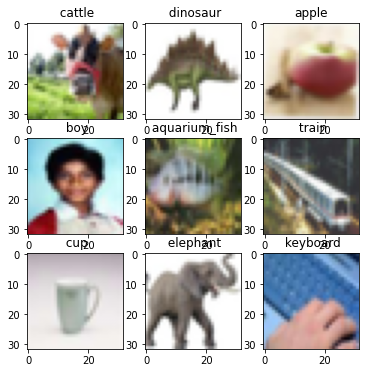

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

#x_train = tf.image.resize(x_train, (64,64))
#x_val = tf.image.resize(x_val, (64,64))
#x_test = tf.image.resize(x_test, (64,64))

print(len(x_val))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Συναρτήσεις εκπαίδευσης

Θα χρησιμοποιήσουμε την ιδιότητα data prefetch του tf2:

In [ ]:
# we user prefetch https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch 
# see also AUTOTUNE
# the dataset is now "infinite"

BATCH_SIZE = 256
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x,y, BATCH_SIZE):
  #x = tf.image.resize(x, [64,64], method='bicubic')
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

dataugm = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.5,
    horizontal_flip=True,
)

dataugm.fit(x_train)


train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1, cb=[]):
  history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks = cb)
  return(history)

## Γραφικές παραστάσεις εκπαίδευσης και απόδοση στο σύνολο ελέγχου

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	plt.figure(figsize=(8, 8))
	plt.suptitle('Training Curves')
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.legend(loc='upper right')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.legend(loc='lower right')
	return plt
 
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps):
	print('\nTest set evaluation metrics')
	loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
	print("loss: {:.2f}".format(loss0))
	print("accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

## Μοντέλα δικτύων

### Ένα μικρό συνελικτικό δίκτυο "from scratch"

In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL = init_simple_model(summary = True)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, 50, 30, 5)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

### Μεταφορά μάθησης: VGG16

In [ ]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_VGG16_model(summary):
  vgg_model=tf.keras.applications.VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')
  
  VGG16_MODEL=vgg_model.layers[0](vgg_model)

  # unfreeze conv layers
  VGG16_MODEL.trainable=True
  
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
VGG16_MODEL = init_VGG16_model(True)
VGG16_MODEL_history = train_model(VGG16_MODEL, 25, 40, 10)

#model_report(VGG16_MODEL, VGG16_MODEL_history, 30)

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               51300     
Total params: 14,765,988
Trainable params: 14,765,988
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
40/40 [==============================] - 4s 68ms/step - loss: 3.9018 - accuracy: 0.1244 - val_loss: 1.7338 - val_accuracy: 0.4852
Epoch 2/25
40/40 [================

# Βελτίωση της επίδοσης με πειράματα

Καλείστε να βελτιώσετε τα αποτελέσματα ταξινόμησης στο CIFAR-100 και να βγάλατε συμπεράσματα, σύμφωνα με όσα ζητούνται σε σχέση με την αναφορά παράδοσης. 

## Δοκιμές διαφορετικών μοντέλων

Μπορείτε είτε να δοκιμάσετε μοντέλα "from scratch", όπου ορίζετε την αρχιτεκτονική του δικτύου όπως θέλετε, είτε να χρησιμοποιήσετε μεταφορά μάθησης.



# Μοντέλα "from scratch"

Μπορείτε να τροποποιήσετε/αλλάξετε το αρχικό μικρό συνελικτικό δίκτυο του παραδείγματος. Μπορείτε να συμβουλευτείτε 
- τη [βιβλιογραφία απο το leaderboard του CIFAR-100](https://benchmarks.ai/cifar-100) για αρχιτεκτονικές και παραμέτρους των δικτύων
- ή/και να πάρετε ιδέες [από σχετική αναζήτηση στο Google Scholar](https://scholar.google.gr/scholar?hl=en&as_sdt=0%2C5&q=cifar+100+cnn&oq=cifa)

Για την δημιουργία του from scratch μοντέλου μας, συμβουλευόμαστε τα ακόλουθα papers ([1](https://openaccess.thecvf.com/content_ICCV_2017/papers/Zoumpourlis_Non-Linear_Convolution_Filters_ICCV_2017_paper.pdf), [2](http://www.bmva.org/bmvc/2016/papers/paper087/paper087.pdf)).

Όπως φαίνεται και στο πρώτο paper, η αρχιτεκτονική που θα ακολουθήσουμε είναι στην παρακάτω εικόνα : 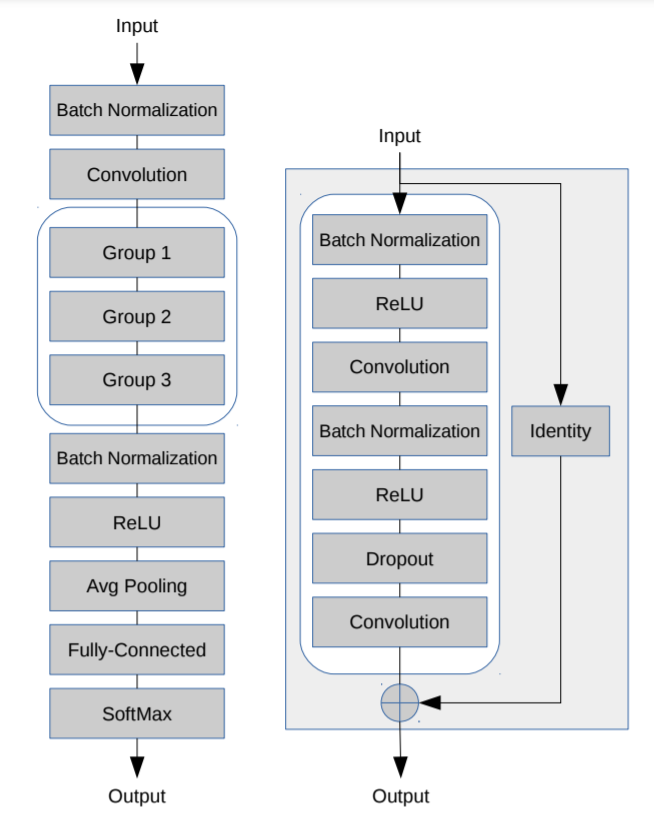

Ουσιαστικά το δίκτυο μας θα αποτελείται από τα παρακάτω επιμέρους μέρη : 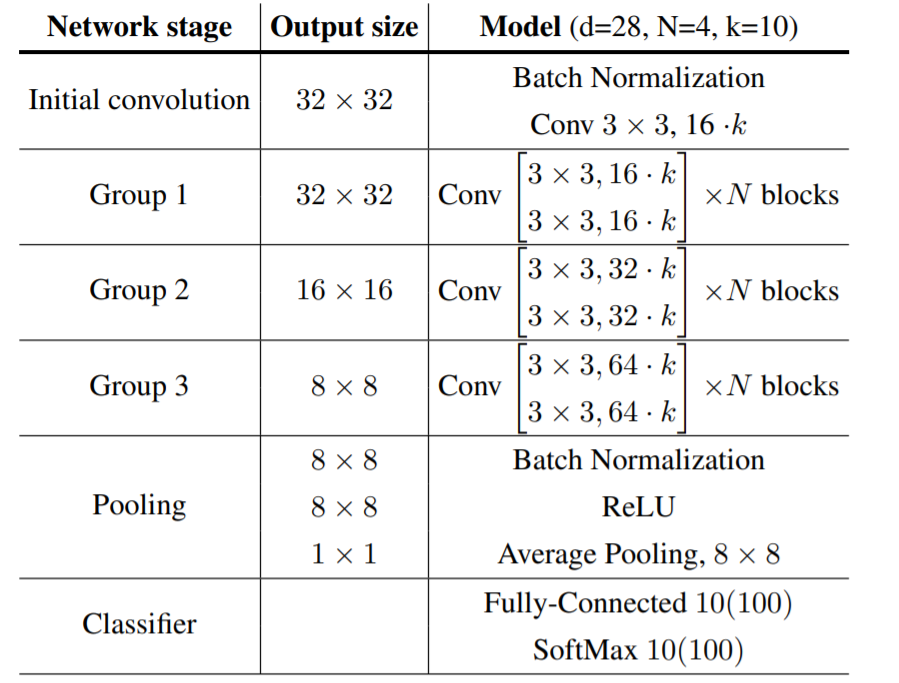

Στα θετικά του συγκεκριμένου μοντέλου είναι ότι χρησιμοποείται ένα είδος ανάδρασης της εισόδου, όπως ακριβώς πραγματοποιεί και το γνωστό μας ResNet, ώστε να διατηρείται η πληροφορία της εισόδου όσο πιο βαθιά κατεβαίνουμε και αυτή εξασθενεί. 

Αρχικά, δημιουργήσαμε το απλό μοντέλο μας με βάση τον κώδικα που φαίνεται παρακάτω και εν συνεχεία προχωρήσαμε σε μια προσπάθεια βελτιστοποίησης αυτού. 

####**Βελτιστοποίηση ως προς απόδοση**

In [ ]:
class Block(layers.Layer):
  def __init__(self, output_channel, k):
    super(Block, self).__init__(name='')
    
    self.batch1 = layers.BatchNormalization()
    self.activ1 = layers.Activation(activations.relu)
    self.conv2a = layers.Conv2D(output_channel*k, (3, 3), padding='same', activation='relu')
    self.batch2 = layers.BatchNormalization()
    self.activ2 = layers.Activation(activations.relu)
    self.drop = layers.Dropout(0.3)
    self.conv2b = layers.Conv2D(output_channel*k, (3, 3), padding='same', activation='relu')
    
  def call(self, input_tensor):
    x = self.batch1(input_tensor)
    x = self.activ1(x)
    x = self.conv2a(x)
    x = self.batch2(x)
    x = self.activ2(x)
    x = self.drop(x)
    x = self.conv2b(x)

    return x
 
class Group(layers.Layer):
  def __init__(self, N,  output_channel, k, first=False):
    super(Group, self).__init__(name='')
    self.blocks = []
    if first:
      N-1
    self.first = first
    for i in range(N):
      self.blocks.append(Block(output_channel, k))

  def call(self, input_tensor):
    result = 0
    for b in self.blocks:
      result += b(input_tensor)
    if self.first:
      result += input_tensor
    return result

In [ ]:
from tensorflow.keras.regularizers import l1   

def init_model(summary, len):

  k = 10
  N = 2

  #initial convolution layer
  model = models.Sequential()
  model.add(layers.BatchNormalization(input_shape=(32,32,3)))
  model.add(layers.Conv2D(16*k, (3, 3), padding='same', activation='relu'))

  #group1: 32x32 output
  #add_group(model, N, 16, k, ['same','same'], True)
  model.add(Group(N, 16, k, first=True))

  #group2: 16x16 output
  #add_group(model, N, 32, k, ['valid','valid'])
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(Group(N, 32, k))

  #group3: 8x8 output
  #add_group(model, N, 64, k, ['same','valid'])
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(Group(N, 64, k))

  #pooling
  model.add(layers.BatchNormalization())
  model.add(layers.Activation(activations.relu))
  model.add(layers.AveragePooling2D(pool_size=(8, 8))) #8x8

  #classifier
  model.add(layers.Flatten())
  model.add(layers.Dense(len, activation='softmax'))
  
  model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.9, momentum=0.9), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
def scheduler(epoch, lr):
  if epoch < 60:
    return 0.1
  elif epoch < 120:
    return 0.02
  elif epoch < 160 :
    return 0.004
  elif epoch < 200:
    return 0.0008
  else :
    return 0.0008

In [ ]:
callback = [tf.keras.callbacks.LearningRateScheduler(scheduler)]
SIMPLE_MODEL = init_model(summary = True, len=100)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, epochs=100, steps_per_epoch=50, validation_steps = 5, cb=[callback]) #αποτελεσματα σε 3

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_286 (Bat (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_275 (Conv2D)          (None, 32, 32, 160)       4480      
_________________________________________________________________
group_33 (Group)             (None, 32, 32, 160)       924800    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 160)       0         
_________________________________________________________________
group_34 (Group)             (None, 16, 16, 320)       2769920   
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 320)         0         
_________________________________________________________________
group_35 (Group)             (None, 8, 8, 640)       

Για να βγάλουμε κάποια αρχικά συμπεράσματα σχετικά με την απόδοση του μοντέλου μας, δουλέψαμε με 20 κλάσεις από το dataset μας CIFAR-100. Επίσης, ορίσαμε k=10 και Ν=4 (που αποτελούν τις υπερπαραμέτρους που φαίνονται στην παραπάνω εικόνα). Επίσης, εκπαιδεύαμε το μοντέλο μας μόνο για 50 εποχές και συγκρίναμε τις επιδόσεις του μοντέλου μέχρι εκείνη την συγκεκριμένη εποχή, προκειμένου να καταλήξουμε σε κάποια κρίσιμα συμπεράσματα για τις υπερπαραμέτρους του μοντέλου. Έτσι μπορέσαμε να πάρουμε κάποιες αρχικές τιμές των παραμέτρων του μοντέλου που θα μας οδηγούσαν σε καλό accuracy.

Στη συνέχεια, πήραμε μετρήσεις αυξάνοντας σταδιακά το πλήθος των κλάσεων (40, 60, 80).

Όπως φαίνεται παραπάνω, πετύχαμε 100% accuracy στο training set και 64% accuracy στο validation set.

Το μοντέλο μας έχει αρκετές υπερπαραμέτρους με τις οποίες πειραμαστήκαμε.
Θα προσπαθήσουμε να τις αναλύσουμε όλες και την επιλογή αυτών όσο περισσότερο μπορούμε παρακάτω. Έτσι, υπό τις παραπάνω συνθήκες έχουμε : 

1. **learning rate** : για την επιλογή αυτής της υπερπαραμέτρου χρησιμοποιήσαμε τον scheduler που αναφέρεται στο πρώτο paper, προκειμένου να βελτιώσουμε την επίδοση του μοντέλου μας. Αρχικά, εκτελέσαμε τις μετρήσεις μας με έναν optimizer SGD βάζοντας τιμές για το learning rate = 0.9 και για το momentum = 0.9. Τα αποτελέσματα που πετυχαίναμε ήταν περίπου 71% για το training accuracy και 54% για το αντίστοιχο validation accuracy. Για να αντιληφθούμε την κακή επίδοση, εκτελέσαμε το ίδιο μοντέλο και για την περίπτωση κ=10. Σε αυτή την περίπτωση, τα αποτελέσματα βελτιώθηκαν σχεδόν αμελητέα, έχοντας ως train_acc ίσο με 74% και val_acc ίσο με 55%. Για να βελτιώσουμε λοιπόν την επίδοση, δημιουργήσαμε έναν scheduler που περάσαμε τις τιμές του learning rate ανάλογα την εποχή που βρισκόμαστε. Μέσω της παραμέτρου callback στην μέθοδο fit του μοντέλου, περάσαμε τον scheduler και έτσι στην αρχή της κάθε εποχής το μοντέλο μας ελέγχει τον scheduler και περνάει την αντίστοιχη τιμή του learning rate στον optimizer μας.

Οι επόμενες τρεις παράμετροι απευθύνται στην αποφυγή του overfitting. Παρατηρώντας τα παραπάνω αποτελέσματα, βλέπουμε ότι έχουμε έντονο overfitting στο συγκεκριμένο dataset. Ωστόσο, η βελτιστοποίηση της απόδοσης, στην οποία στοχεύουμε εδώ, μας οδηγεί στο να επιλέξουμε εκείνο το μοντέλο που τελικά δίνει τη μέγιστη απόδοση ακόμα κι αν προκαλεί αυτό το φαινόμενο. Σε πολλές από τις παρακάτω περιπτώσεις, η βελτίωση της απόδοσης ήταν πολύ μικρή σε σύγκριση με το όφελος που θα είχαμε από το να χρησιμοποιήσουμε π.χ. early stopping. Όμως, εδώ ο στόχος μας είναι ακριβώς αυτός, επομένως ακολουθούμε έστω και αυτές τις μικρές βελτιώσεις. 

2. **data augmentation** : To φαινόμενο της υπερεκπαίδευσης συνήθως συμβαίνει όταν έχουμε λίγα ή/και πολύ όμοια δεδομένα εκπαίδευσης. Ένας τρόπος να διορθωθεί αυτό το πρόβλημα είναι να αυξήσουμε τα δεδομένα (data augmentation). Το data augmentation δημιουργεί νέα δεδομένα εκπαίδευσης με βάση τα υπάρχοντα εφαρμόζοντας τυχαίους μετασχηματισμούς ώστε να προκύπτουν αληθοφανείς εικόνες. Για να εφαρμόσουμε εμείς data augmentation στο dataset μας, χρησιμοποιούμε το Image Generator. Χωρίς την χρήση data augmentation, πετυχαίναμε train_acc 83.76% και val_acc 61.56%. Ως παραμέτρους του Image Generator προσπαθήσαμε κάποιους λίγους συνδυασμούς, καταλήγοντας σε αυτούς που φαίνονται στον κώδικα : 
dataugm = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.5,
    horizontal_flip=True,
). Με βάση αυτό πετύχαμε train_acc 82.91% και val_acc 66.41%. Παρατηρούμε ότι το train_acc δεν βελτιώνεται, σε αντίθεση με το val_acc που βελτιώνεται σημαντικά. Έτσι, γίνεται εύκολα αντιληπτό ότι μπορούμε να αντιμετωπίσουμε κατά αυτόν τον τρόπο φαινόμενα overfitting. Η συγκεκριμένη παράμετρος μάλιστα, αντιμετωπίζει το overfitting **και** βελτιώνει την απόδοση του συστήματος. 

3. **Dropout** : Η τεχνική Dropout αποτελεί άλλη μία τεχνική μείωσης του overfitting. Πρόκειται για ένα είδος ομαλοποίησης (regularization) που επιβάλλει στα βάρη του δικτύου να παίρνουν μόνο μικρές τιμές. Εάν εφαρμόσουε dropout σε ένα επίπεδο του δικτύου, τότε ένα ποσοστό των βαρών του γίνεται τυχαία μηδενικό κατά την εκπαίδευση. Το μοντέλο που χρησιμοποιήσαμε, όπως φαίνεται και στην αναλύση του στην εικόνα παραπάνω, χρησιμοποιεί κάποια layers Dropout μέσα στα Groups. Η πιθανότητα που γίνεται το Dropout ορίζεται ως 0.3.

4. **EarlyStopping** : Αν και πειραματιστήκαμε με την εφαρμογή της μεθόδου του early stopping και με πολλές τιμές patience, η αφαίρεση του early stopping απο το μοντέλο συνεπαγόταν πάντα την (αρκετά μικρή) αύξηση της απόδοσής του. Δεδομένου του στόχου μας, να οδηγηθούμε στη βέλτιστη απόδοση, το αφαιρέσαμε από το τελικό μοντέλο. 

5. **optimizer** : Πειραματιστήκαμε με δύο optimizers, τον SGD και τον Adam. Για όλα τα πλήθη κλάσεων (20, 40, 60, 80) ο SGD έδινε -ελαφρώς- καλύτερα αποτελέσματα. Το γεγονός αυτό δε μας κάνει εντύπωση βέβαια. Ο SGD είναι ο optimizer που χρησιμοποιείται και στο [paper](https://openaccess.thecvf.com/content_ICCV_2017/papers/Zoumpourlis_Non-Linear_Convolution_Filters_ICCV_2017_paper.pdf) που μελετήσαμε για να ανπτύξουμε το μοντέλο.

6. **batch_size** : Καταλήγουμε σε τιμή γαι το batch size ίση με 256. Κατ' αρχάς σημειώνουμε ότι στο [paper](https://openaccess.thecvf.com/content_ICCV_2017/papers/Zoumpourlis_Non-Linear_Convolution_Filters_ICCV_2017_paper.pdf) που μελετήσαμε η αντίστοιχη τιμή είναι 128. Η ύπαρξη διαφορών με τα αποτελέσματα μας και τα αντίστοιχα της έρευνας είναι λογική, καθώς εδώ δεν ασχολούμαστε με το σύνολο των δεδομένων του CIFAR-100.
Επιπλέον, σημειώνουμε μία συσχέτιση μεταξύ του φαινομένου του overfitting και του batch size. Παρατηρήσαμε ότι όσο αυξάναμε το μέγεθος αυτό το training accuracy αυξανόταν αρκετά, χωρίς αντίστοιχη αύξηση του validation accuracy. 


7. **αριθμός εποχών και steps** : Καταλήγουμε σε 100 εποχές training και 50 steps για κάθε εποχή. Η τιμή αυτή (100 εποχές) διαφέρει, επίσης, με την αντίστοιχη του [paper](https://openaccess.thecvf.com/content_ICCV_2017/papers/Zoumpourlis_Non-Linear_Convolution_Filters_ICCV_2017_paper.pdf) που ήταν 220. Όπως φαίνεται και στα παραπάνω αποτελέσματα, ήδη από την 70οστή εποχή η εκπαίδευση έχει φτάσει τη βέλτιστη τιμή της. Όπως ξαναναφέραμε, βέβαια, εδώ δε μελετάμε το σύνολο του CIFAR-100. Μάλιστα, ο αριθμός εποχών που χρειαζόμαστε αυξανόταν με το πλήθος των κλάσεων που μελετούσαμε. Η παρατήρηση αυτή, αιτιολογεί τη διαφορά αυτή. Επιπλεόν, ο αριθμός των steps είναι μία από τις παραμέτρους που προσέφερε μικρή (της τάξης του 1%) αύξηση του τελικού accuracy. 

8. **αριθμός κλάσεων** : Η προσθήκη κλάσεων προς διαχωρισμό σήμαινε τη μείωση του accuracy που πετυχαίνει το σύστημά μας. Χαρακτηριστικά ανφέρουμε ότι για 20 κλάσεις πετυχαίνουμε accuracy της τάξης 67% στο validation set, ενώ για τις 80 το καλύτερο που μπορούμε να πετύχουμε είναι 64%. Παρόλα αυτά, παρουσιάζουμε τα αποτελέσματα για τις 80 κλάσεις γιατί αυτό είναι το τελικό ζητούμενο. Σημειώνουμε ότι, εκτός από το πλήθος των εποχών, η προσθήκη κλάσεων δε φάνηκε να επηρεάζει σημαντικά κάποια από τις άλλες παραμέτρους του συστήματος, Δηλαδή, οι ίδιες μεταβολές των παραμέτρων για κάθε πλήθος κλάσεων είχε τα ίδια αποτελέσματα (βελτίωση ή χειροτέρευση) των αποτελεσμάτων.

9. **παράμετροι μοντέλου (k, Ν)** : Πειραματιστήκαμε με τις τιμές του μεγέθους του μοντέλου μας και την επίδρσή τους στην απόδοση του συστήματος. Οι αρχικές τιμές τους, όπως αναφέρεται και στην εισαγωγή, είναι k=10, N=4. Η παράμετρος k πράγματι δίνει τη βέλτιστη απόδοση για τιμή 10 στο dataset μας. Η παράμετρος Ν, ωστόσο, μειώθηκε στην τιμή 2. Η μείωση αυτή είχε ως αποτέλεσμα μια μικρή αλλά υπαρκτή αύξηση στην επίδοση του συστήματος. Συμπεραίνουμε ότι λόγω του μικρότερου μέρους του CIFAR-100 που μελετάμε εδώ φαίνεται το δίκτυο να μη χρειάζεται το επιπλέον φάρδος (width) που προσφέρει αυτή η παράμετρος.

10. **resize input** : Αλλάζοντας το μέγεθος της εισόδου μας, θα πρέπει να αλλάξουμε συνολικά και όλο το μοντέλο που δημιουργήσαμε. Το paper που εμπνευστήκαμε δημιουργεί το μοντέλο με σταθερό μέγεθος input και επομένως ακολουθούμε ακριβώς αυτό και εμείς και δεν το μεταβάλλουμε.



Test set evaluation metrics
100/100 [==============================] - 15s 144ms/step - loss: 1.7198 - accuracy: 0.6362
loss: 1.72
accuracy: 0.64


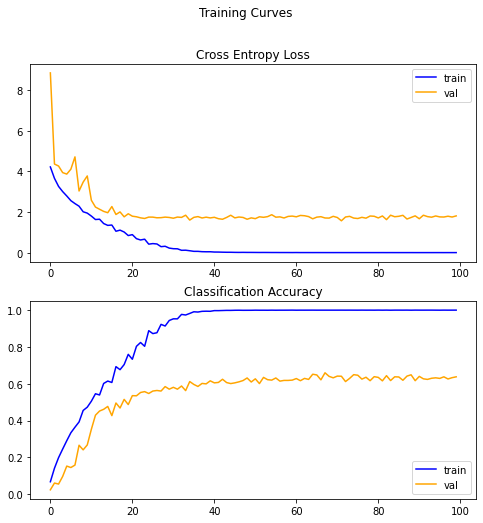


Test set evaluation metrics
100/100 [==============================] - 15s 146ms/step - loss: 1.7245 - accuracy: 0.6355
loss: 1.72
accuracy: 0.64


In [ ]:
#summarize_diagnostics(SIMPLE_MODEL_history)
model_evaluation(SIMPLE_MODEL, 100)
model_report(SIMPLE_MODEL, SIMPLE_MODEL_history, 100)

Πετυχαίνουμε 64% accuracy στο test set. Σημειώνουμε ότι το [paper](https://openaccess.thecvf.com/content_ICCV_2017/papers/Zoumpourlis_Non-Linear_Convolution_Filters_ICCV_2017_paper.pdf) που μελετήσαμε αναφέρει ως τελικά αποτελέσματα στο σύνολο του dataset CIFAR-100, accuracy 82%.

Οι παραπάνω γραφικές μας επιβεβαιώνουν μία παρατήρηση που έχουμε ήδη κάνει. Το σύστημα έχει φτάσει σχεδόν στη μέγιστη επίδοσή του από την εποχή 40. Ωστόσο, ο στόχος της βελτιστοποίησής μας μάς επιβάλλει να εκμεταλλευτούμε και το 1% απόδοσης που μπορούμε να κερδίσουμε από τις επιπλέον εποχές. 

Συνεπώς, ο χρόνος εκπαίδευσης του μοντέλου είναι αρκετά μεγάλος. Επιπλέον, σημαντικό μέρος αυτού του χρόνου φαίνεται να μην αξίζει για το αποτέλεσμα που προσφέρει. Συμπεραίνουμε ότι η βελτιστοποίηση ενός συστήματος με μοναδικό στόχο το accuracy είναι μία μη πρακτική προσέγγιση, γι' αυτό και στις περισσότερες εφαρμογές ο στόχος της επίδοσης συνδυάζεται με άλλες απαιτήσεις των πραγματικών εφαρμογών.

####**Βελτιστοποίηση ως προς χρόνο εκπαίδευσης**

Για την βελτιστοποίηση του χρόνου εκπαίδευσης, όπως είδαμε και παραπάνω χρησιμοποίησαμε αρχικά την τεχνική του prefetching. Ουσιαστικά, πρόκειται για μία τεχνική κατά την οποία σε κάθε βήμα s του training, φορτώνουμε παράλληλα τα δεδομένα στο input pipeline που χρειάζονται για το βήμα s+1. Με αυτόν τον τρόπο, ο χρόνος του συγκεκριμένου βήματος θα ισούται με το μέγιστο χρόνο μεταξύ της εκπαίδευσης και του χρόνου μεταφοράς των δεδομένων. Χωρίς το prefetching θα έπρεπε να αθροίσουμε τους αντίστοιχους χρόνους. Στη συνέχεια, δικιμάζουμε να αφαιρέσουμε αυτή τη βελτιστοποίηση για να ελέγξουμε πόσο επηρεάζει τα αποτελέσματά μας:.

In [ ]:
import tensorflow as tf
import time

BATCH_SIZE = 256
#AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  #ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

dataugm = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.5,
    horizontal_flip=True,
)

dataugm.fit(x_train)

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1, cb=[]):
  history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks = cb)
  return(history)

In [ ]:
SIMPLE_MODEL = init_model(summary = True, len=100)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, epochs=5, steps_per_epoch=50, validation_steps = 5, cb=[callback]) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_42 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 160)       4480      
_________________________________________________________________
group_9 (Group)              (None, 32, 32, 160)       924800    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 160)       0         
_________________________________________________________________
group_10 (Group)             (None, 16, 16, 320)       2769920   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 320)         0         
_________________________________________________________________
group_11 (Group)             (None, 8, 8, 640)        

Συγκρίνοντας με τους χρόνους της αρχικής εκπαίδευσης βλέπουμε πολύ μικρή αύξηση. Συγκεκριμένα στην πρώτη εποχή έχουμε μείωση του χρόνου εκπαίδευσης, στη δεύτερη αύξηση κατά 1 second ενώ στις υπόλοιπες έχουμε πολύ μικρές αυξήσεις της τάξης των milisecond. Καταλαβαίνουμε ότι, στη συγκεκριμένη εφαρμογή, ο χρόνος εκπαίδευσης είναι πολύ μεγάλος ειδικά συγκρινόμενος με το χρόνο μεταφοράς δεδομένων από τη μνήμη. Γι' αυτό και η βελτίωση από τη μέθοδο του prefetching είναι ελάχιστη.



Στη συνέχεια εξετάσαμε κάποιες επιπλέον προτεινόμενες τεχνικές μείωσης του χρόνου εκπαίδευσης : 

**Interleaving** : αυτή η τεχνική είναι ιδιαίτερα χρήσιμη για την παραλληλοποίηση κατά την εξαγωγή δεδομένων από δύο διαφορετικά (ή παραπάνω) Datasets. Αυτό που πραγματοποιεί στην ουσία είναι η παραλληλοποίηση του βήματος φόρτωσης δεδομένων, κάνοντας μια επικάλυψη σε όλα τα Datasets. Έτσι, μπορούμε να γλιτώσουμε σημαντικό χρόνο που σπαταλάται κατά το άνοιγμα των αρχείων των Datasets, παραλληλοποιώντας αυτή την διαδικασία. Ωστόσο, όπως γίνεται εύκολα κατανοητό, το συγκεκριμένο δεν βρίσκει εφαρμογή στο παράδειγμα μας, καθώς έχουμε ένα ενιαίο Dataset. Η σκέψη διάσπασης του ώστε να εφαρμόσουμε την τεχνική θα μας αντισταθμίσει τον χρονικό κέρδος και δεν έχει κανένα απολύτως νόημα.

**parallel mapping** : χρησιμοποιείται για παραλληλοποίηση της διαδικασίας του mapping των δεδομένων μας. Όμως, όπως και παραπάνω, έτσι και εδώ, δεν θέλουμε να κάνουμε map τα δεδομένα μας με κάποια συνάρτηση και επομένως δεν χρησιμοποιείται. 

**reducing memory footprint** : όμοια μ τις δύο παραπάνω περιπτώσεις, η μέθοδος αυτή έχει νόημα αν πραγματοποιούμε κάποιου είδους προεπεξεργασία στα δεδομένα μας. Σύμφωνα με αυτή, είναι σημαντική η σειρά με την οποία θα κάνουμε το caching (βλέπε παρακάτω) και θα εφαρμόσουμε τη συνάρτηση προεπεξεργασίας, εάν η τελευταία μεταβάλει το μέγεθος των δεδομένων. Εδώ, ωστόσο, μια τέτοια τεχνική δεν μας είναι χρήσιμη.

**caching** : η τεχνική αυτή χρησιμοποιείται για να αποθηκεύσει τα δεδομένα μας (να τα cache-αρει) είτε στην μνήμη είτε σε κάποιον τοπικό χώρο αποθήκευσης. Κατά αυτόν τον τρόπο, μπορούμε να γλιτώσουμε κάποιες λειτουργίες (όπως file opening και data reading) από το να γίνονται σε κάθε εποχή. Εφαρμόζουμε παρακάτω :  

In [ ]:
import tensorflow as tf
import time
from tensorflow.data import Dataset

BATCH_SIZE = 256
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance


def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE).cache()
  #ds = ds.interleave(lambda x,y : Dataset.from_tensors(x), num_parallel_calls=AUTOTUNE)
  return ds

dataugm = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.5,
    horizontal_flip=True,
)

dataugm.fit(x_train)

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1, cb=[]):
  history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps, callbacks = cb)
  return(history)

In [ ]:
SIMPLE_MODEL = init_model(summary = True, len=100)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, epochs=5, steps_per_epoch=50, validation_steps = 5, cb=[callback]) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_14 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 160)       4480      
_________________________________________________________________
group_3 (Group)              (None, 32, 32, 160)       924800    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 160)       0         
_________________________________________________________________
group_4 (Group)              (None, 16, 16, 320)       2769920   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 320)         0         
_________________________________________________________________
group_5 (Group)              (None, 8, 8, 640)        

Παρατηρούμε μία πολύ σημαντική βελτίωση του χρόνου, καθώς μειώθηκε σχεδόν στο μισό. Έτσι, φαίνεται να είναι μία αρκετά χρήσιμη τεχνική που μπορούμε να εφαρμόσουμε για πιο γρήγορα αποτελέσματα.

####**Βελτιστοποίηση ως προς μνήμη**

Ως προς την βελτιστοποίηση στο θέμα μνήμης, θα πρέπει να να σειριοποιήσουμε τα δεδομένα και να τα αποθηκεύσουμε σε αρχεία μεσαίου μεγέθους, τα οποία μπορούν να αναγνώσουν γραμμικά, ώστε να αποφύγουμε την πιθανότητα υπερφόρτωσης της RAM της CPU ή της GPU. Ωστόσο στο δικό μας πρόβλημα με το δεδομένο dataset μας, παρατηρούμε ότι η συνολική χρήση της RAM είναι αρκετά μικρή και επομένως θεωρητικά δεν είναι αναγκαία κάποια βελτιστοποίηση της συνολικής κατανάλωσης της. Ωστόσο, θα εφαρμόσουμε την τεχνική του φορμάτ TFRecord που προτείνεται για την αποθήκευση σειράς δυαδικών εγγραφών.

In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib

     |████████████████████████████████| 3.7MB 5.4MB/s 


In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k

In [ ]:
import tensorflow_datasets as tfds

ds, info = tfds.load('cifar100', split=['train', 'test'], as_supervised=True, with_info=True)
print(ds)

[<PrefetchDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>, <PrefetchDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>]


,image,label
0,,66 (raccoon)
1,,23 (cloud)
2,,40 (lamp)
3,,39 (keyboard)

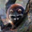
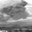
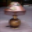
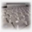

In [ ]:
tfds.as_dataframe(ds[0].take(4), info)

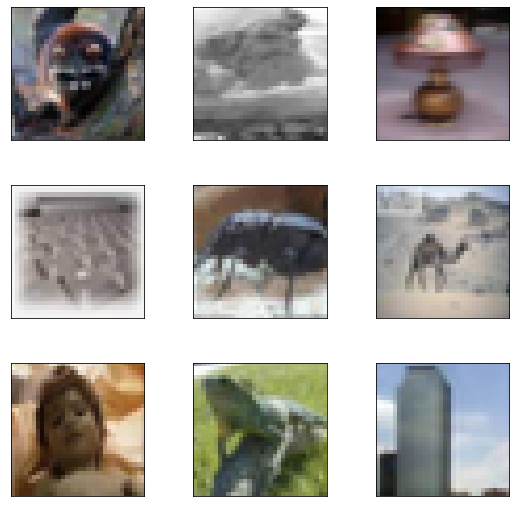

In [ ]:
fig = tfds.show_examples(ds[0], info)

Στις παρακάτω 2 εικόνες βλέπουμε την διαφορά της μνήμης RAM που χρησιμοποιείται πριν και μετά από την παραπάνω χρήση : 
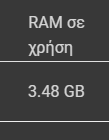
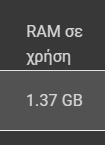

Παρατηρούμε έντονη μείωση της RAM. Ωστόσο, όπως είπαμε και πριν, αυτή η διαδικασία δεν μας προσφέρει σημαντικά οφέλη στην συγκεκριμένη περίπτωση, καθώς δεν έχουμε πρόβλημα με την χρήση της μνήμης RAM. Επίσης, εμείς χρησιμοποιούμε 80 κλάσεις από τις 100 (ή και λιγότερες) για το μοντέλο μας, ενώ κατά την παραπάνω διαδικασία χρησιμοποιούμε το σύνολο των 100 κλάσεων. Για να προσαρμοστούμε σε αυτή την διαφορά, θα μπορούσαμε να κάναμε χρήση της TFRecord "χειροκίνητα", δηλαδή να εφαρμόσουμε την συγκεκριμένη σειριακή μορφή μόνοι μας στα δεδομένα μας. 

####**Βελτιστοποίηση ως προς overfitting**

Σχετικά με την βελτιστοποίηση ως προς overfitting, παρατηρούμενο ότι το τελικό μας μοντέλο "πάσχει" από overfitting, καθώς από πολύ νωρίς ακόμα αγγίζει το 100% στο training accuracy. Ωστόσο, όπως φάνηκε και στην παραπάνω ανάλυση μας κάναμε χρήση και των τριών τεχνικών που προτείνονται για την αποφυγή του overfitting : χρήση **Dropout layers**, χρήση **EarlyStopping** και εφαρμογή **Data Augmentation**. 

Παρακάτω, θα κάνουμε μία ακόμα προσπάθεια να μειώσουμε το overfitting. Συγκεκριμένα, δοκιμάζουμε να αυξήσουμε ταυτόχρονα τον αριθμό των Dropout layers, βάζοντας dropout layer κάθε φορά μετά από ένα pooling και επιπλέον χρησιμοποιώντας την τεχνική του checkpoint. Με βάση αυτή την τεχνική αποθηκεύουμε κάθε φορά τα βάρη του μοντέλου μας που μας δίνουν την βέλτιστη μετρική που θέλουμε. Στη συγκεκριμένη περίπτωση που προσπαθούμε να αποφύγουμε το overfitting, χρειαζόμαστε καλύτερο accuracy στο validation set και έτσι εφαρμόζουμε ως monitor την μετρική val_accuracy. Εκπαιδεύουμε το μοντέλο μας όπως και πριν και συγκρίνουμε :

In [ ]:
class Block(layers.Layer):
  def __init__(self, output_channel, k):
    super(Block, self).__init__(name='')
    
    self.batch1 = layers.BatchNormalization()
    self.activ1 = layers.Activation(activations.relu)
    self.conv2a = layers.Conv2D(output_channel*k, (3, 3), padding='same', activation='relu')
    self.batch2 = layers.BatchNormalization()
    self.activ2 = layers.Activation(activations.relu)
    self.drop = layers.Dropout(0.3)
    self.conv2b = layers.Conv2D(output_channel*k, (3, 3), padding='same', activation='relu')
    
  def call(self, input_tensor):
    x = self.batch1(input_tensor)
    x = self.activ1(x)
    x = self.conv2a(x)
    x = self.batch2(x)
    x = self.activ2(x)
    x = self.drop(x)
    x = self.conv2b(x)

    return x
 
class Group(layers.Layer):
  def __init__(self, N,  output_channel, k, first=False):
    super(Group, self).__init__(name='')
    self.blocks = []
    if first:
      N-1
    self.first = first
    for i in range(N):
      self.blocks.append(Block(output_channel, k))

  def call(self, input_tensor):
    result = 0
    for b in self.blocks:
      result += b(input_tensor)
    if self.first:
      result += input_tensor
    return result

In [ ]:
from tensorflow.keras.regularizers import l1   

def init_model(summary, len):

  k = 10
  N = 2

  #initial convolution layer
  model = models.Sequential()
  model.add(layers.BatchNormalization(input_shape=(32,32,3)))
  model.add(layers.Conv2D(16*k, (3, 3), padding='same', activation='relu'))

  #group1: 32x32 output
  #add_group(model, N, 16, k, ['same','same'], True)
  model.add(Group(N, 16, k, first=True))

  #group2: 16x16 output
  #add_group(model, N, 32, k, ['valid','valid'])
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(Group(N, 32, k))

  #group3: 8x8 output
  #add_group(model, N, 64, k, ['same','valid'])
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))
  model.add(Group(N, 64, k))

  #pooling
  model.add(layers.BatchNormalization())
  model.add(layers.Activation(activations.relu))
  model.add(layers.AveragePooling2D(pool_size=(8, 8))) #8x8
  model.add(layers.Dropout(0.3))

  #classifier
  model.add(layers.Flatten())
  model.add(layers.Dense(len, activation='softmax'))
  
  model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.9, momentum=0.9), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
def scheduler(epoch, lr):
  if epoch < 60:
    return 0.1
  elif epoch < 120:
    return 0.02
  elif epoch < 160 :
    return 0.004
  elif epoch < 200:
    return 0.0008
  else :
    return 0.0008

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

chpoint = ModelCheckpoint('best.h5', monitor='val_accuracy', save_weights_only=True)
callback = [tf.keras.callbacks.LearningRateScheduler(scheduler), chpoint]

In [ ]:
SIMPLE_MODEL = init_model(summary = True, len=100)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, epochs=100, steps_per_epoch=50, validation_steps = 5, cb=callback)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 160)       4480      
_________________________________________________________________
group (Group)                (None, 32, 32, 160)       924800    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 160)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 160)       0         
_________________________________________________________________
group_1 (Group)              (None, 16, 16, 320)       2769920   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 320)         0


Test set evaluation metrics
100/100 [==============================] - 8s 81ms/step - loss: 1.5664 - accuracy: 0.6086
loss: 1.57
accuracy: 0.61


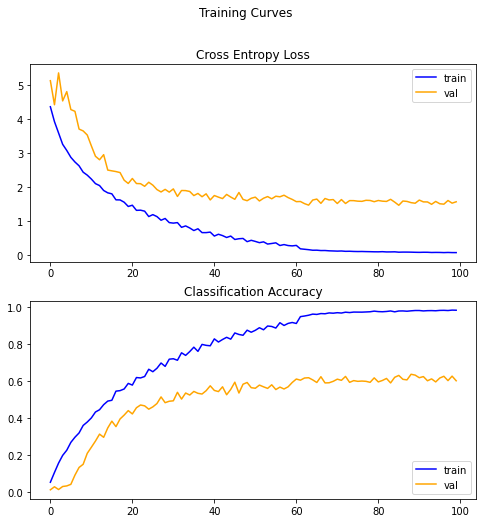


Test set evaluation metrics
100/100 [==============================] - 8s 80ms/step - loss: 1.5605 - accuracy: 0.6094
loss: 1.56
accuracy: 0.61


In [ ]:
model_evaluation(SIMPLE_MODEL, 100)
model_report(SIMPLE_MODEL, SIMPLE_MODEL_history, 100)

Παρατηρούμε ότι το μοντέλο μας συγκλίνει πιο αργά στο 100% accuracy στο training test. Όμως, το validation accuracy είναι μικρότερο από αυτό που πετύχαμε στην προηγούμενη περίπτωση κατά μία τάξη 3-4%. Ίσως σε αυτή την περίπτωση χρειαστούμε περισσότερες εποχές, αλλά και έτσι δεν φαίνεται να λειτουργεί αναμενόμενα. 

# Μεταφορά μάθησης

Εναλλακτικά, μπορείτε να χρησιμοποιήσετ τη [μεταφορά μάθησης του tf2](https://www.tensorflow.org/tutorials/images/transfer_learning). Σε αντίθεση με τα μοντέλα "from scratch" η μεταφορά μάθησης μας επιστρέφει έτοιμα μοντέλα με προκαθορισμένη αρχιτεκτονική στην οποία μπορούμε γενικά μόνο να προσθέσουμε επίπεδα, τα οποία συνήθως περιορίζοντα σε πλήρως διασυνδεδεμένα επίπεδα που εξειδικεύονται στο συγκεκριμένο task ταξινόμησης που έχουμε να επιτελέσουμε. 

####**Βελτιστοποιήση ως προς απόδοση**

#####**VGG16**

In [ ]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_VGG16_model(summary, input):
  vgg_model=tf.keras.applications.VGG16(input_shape=input, include_top=False, weights='imagenet')
  
  VGG16_MODEL=vgg_model.layers[0](vgg_model)

  #print("Number of layers in the base model: ", len(VGG16_MODEL.layers))
  # unfreeze conv layers
  #VGG16_MODEL.trainable=True
  
  for layer in VGG16_MODEL.layers[:5]:
    layer.trainable =  False

  dropout_layer = tf.keras.layers.Dropout(rate = 0.15)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               51300     
Total params: 14,765,988
Trainable params: 14,653,412
Non-trainable params: 112,576
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 5s 85ms/step - loss: 4.5311 - accuracy: 0.0387 - val_loss: 3.3527 - val_accuracy: 0.2125
Epoch 2/50
50/50 [==============================] - 4s 81ms/step - loss: 3.3155 - accuracy: 0

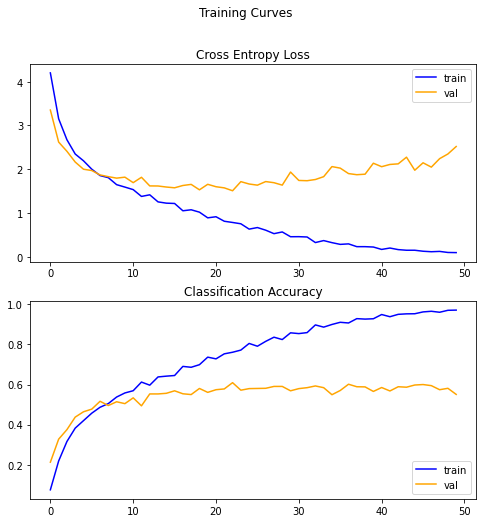


Test set evaluation metrics
30/30 [==============================] - 1s 28ms/step - loss: 2.2429 - accuracy: 0.5919
loss: 2.24
accuracy: 0.59


In [ ]:
VGG16_MODEL = init_VGG16_model(True, (32,32,3))

#callback = [tf.keras.callbacks.LearningRateScheduler(scheduler)]
VGG16_MODEL_history = train_model(VGG16_MODEL, 50, 50, 5, cb = [])

model_report(VGG16_MODEL, VGG16_MODEL_history, 30)

Για την βελτιστοποίηση του μοντέλου μας αυτή την φορά, κάνουμε χρήση της τεχνικής της μεταφοράς μάθησης. Αρχικά, το πρώτο έτοιμο μοντέλο που θα χρησιμοποιήσουμε είναι το VGG16. Στα ήδη προεκπαιδευμένα βάρη του μοντέλου, προσθέτουμε ένα επίπεδο dropout, ένα global average pooling και ένα dense layer. Το VGG16 είναι ικανό να μας δώσει αρκετά ικανοποιητικά αποτελέσματα σε δεδομένα εικόνων. Περιλαμβάνει ένα σύνολο 19 layers, τα οποία καθορίζουν 14714688 παραμέτρους. 

Θα ακολουθήσουμε και εδώ μία παρόμοια ανάλυση με εκείνη της περίπτωσης του from scratch μοντέλο. Εφαρμόσαμε αρκετά πειράματα, αλλάζοντας τις διάφορες παραμέτρους και καταλήξαμε στα εξής αποτελέσματα και συμπεράσματα : 

**trainable :** πρόκειται για μια boolean μεταβλητή, η οποία καθορίζει αν τα layers με τα προκαθορισμένα βάρη που έχουμε πάρει από το έτοιμα εκπαιδευμένο VGG16 στο imagenet θα συνεχίσουν να εκπαιδεύονται κατά την δική μας εφαρμογή ή αν θα παγώσουν στις συγκεκριμένες τιμές. Αρχικά, το ορίζουμε ως false, κρατώντας δηλαδή σταθερές τις έτοιμες τιμές. Το δίκτυο πλέον έχει ελάχιστα επίπεδα και παραμέτρους να εκπαιδεύσει (μόνο των τελευταίων επιπέδων που προσθέσαμε). Κάνουμε training για 100 εποχές, διατηρώντας τις υπόλοιπες παραμέτρους σταθερές και ίσες με τις προηγούμενες τιμές που αφήσαμε το from scratch μοντέλο. Πετυχαίνουμε απόδοση ίση με 20% στο training και 23,2% στο validation. Όπως είναι λογικό, οι τιμές είναι αρκετά μικρές, αφού τα περισσότερα βάρη δεν αλλάζουν και δεν προσαρμόζονται στη νέα μας εφαρμογή (δεν υπάρχει fine tuning). Ύστερα, ορίζουμε την μεταβλητή ίση με true. Πλέον μπορούμε να εφαρμόσουμε λιγότερες εποχές κατά την εκπαίδευση στα πλαίσια του fine tuning. Σε 50 εποχές, πετυχαίνουμε training accuracy 96.9% και validation accuracy 59.6%, αποτελέσματα πολύ καλύτερα από την προηγούμενη περίπτωση. Επιπλέον, έχουμε και μία τρίτη δυνατότητα : να καθορίσουμε τον αριθμό των layers που θα επιλέξουμε να "παγώσουμε", ώστε να εκπαιδεύσουμε μόνο ένα ποσοστό των συνολικών βαρών (ξεκινώντας από το τέλος προς την αρχή, μεταφέροντας αναλόγως το σφάλμα κατά το back propagation). Από τα 19 layers, επιλέγουμε να κάνουμε freeze τα 10 πρώτα και πετυχαίνουμε μία σύγκλιση του μοντέλου ήδη από την 28η εποχή σε 100% training accuracy και 80% validation. Κάνοντας freeze 15 layers πετυχαίνουμε πάλι μία σύγκλιση από την 29η εποχή σε 100% training και 75% validation accuracy. Τέλος, παγώνοντας 5 επίπεδα μόνο πετυχαίνουμε 100% training και 82% validation accuracy. Συνεπώς, φαίνεται να υπάρχει ένα tradeoff μεταξύ της απόδοσης και του χρόνου fine tuning, αφού παγώνοντας λιγότερα επίπεδα κερδίζουμε σε καλύτερα αποτελέσματα, αλλά χάνουμε σημαντικά στον συνολικό χρόνο εκπαίδευσης του δικτύου. (τα αποτελέσματα κατά το freezing έγιναν στις 20 κλάσεις).

**πλήθος κλάσεων :** οι παραπάνω μετρήσεις για τους διάφορους αριθμός από freezed layers έγιναν, έχοντας 20 κλάσεις από το dataset μας. Και εδώ (όπως και στην περίπτωση του from scratch) κάναμε δοκιμές και με τις υπόλοιπες τιμές. Ενδεικτικά για 20 κλάσεις πετυχαίναμε 100% training accuracy και 80% validation (τιμές που φαίνεται να είναι οι μέγιστες που μπορούμε να πετύχουμε μεταξύ όλων των συνδυασμών τιμών) και το μοντέλο μας σύγκλινε ήδη από την 9η εποχή, ενώ για την περίπτωση των 80 κλάσεων πετυχαίνουμε training accuracy 97% και validation accuracy 55%. Επομένως, ο αριθμός κλάσεων φαίνεται να επηρεάζει αρκετά το validation accuracy, τον χρόνο εκπαίδευσης του μοντέλου μας και την σύγκλιση αυτού. 

**data augmentation :** οι τιμές της εφαρμογής του data augmentation αφήνονται ίδιες με την περίπτωση του from scratch μοντέλου, καθώς εκεί πήραμε αρκετά ικανοποιητικά αποτελέσματα. Με μικρές μεταβολές αυτών, βλέπουμε ότι συνεχίζουν να είναι οι πιο συμφέρουσες τιμές και επομένως μένουμε με αυτές. 

**Dropout :** την τεχνική dropout την αναλύσαμε περισσότερο στην περίπτωση του from scratch μοντέλου. Σε αυτή την περίπτωση του VGG16, χρησιμοποίησαμε ένα dropout layer στο τέλος μετά από τα "έτοιμα" layers για την αποφυγή του overfitting. Καλύτερη τιμή ως προς την απόδοση μας θέσαμε το 0.15.

**optimizer & learning rate :** Σε αυτό το μοντέλο του VGG16 και στην συγκεκριμένη εφαρμογή, ο optimizer Adam φαίνεται να μπορεί να πετύχει σαφώς καλύτερα αποτελέσματα. Συγκεκριμένα, εφαρμόσαμε κάτω από τις ίδιες συνθήκες SGD αντί για τον Adam και τα αποτελέσματα που πήραμε ήταν αρκετά απογοητευτικά με το training accuracy να είναι στο 43% και το validation accuracy στο 53% σε εκπαίδευση 50 εποχών. Αξιοσημείωτο, ωστόσο, είναι ότι το validation accuracy είναι μεγαλύτερο από το training, κάτι που μπορεί να ερμηνευθεί ως θετικό για την αποφυγή του overfitting. Όμως, τα αποτελέσματα είναι σημαντικά απογοητευτικά και συνεπώς, προτιμάμε Adam optimizer για την συγκεκριμένη εφαρμογή. Το learning rate, τέλος, έμεινε σταθερό και ίσο με 0.00005, δίνοντας μας τα καλύτερα δυνατά αποτελέσματα. 

**batch_size :** Σχετικά με το batch size ξεκινήσαμε και εδώ τα πειράματα μας από μια σταθερή τιμή ίση με 256 και κατεβαίναμε κατά δυνάμεις του 2. Στα 128 παρατηρήσαμε ακριβώς όμοια αποτελέσματα στην εκπαίδευση του μοντέλου χωρίς ουσιαστικές αλλαγές. Στο 64, πλέον, είδαμε ότι το batch size είναι και αυτό ένα μέγεθος ικανό να επηρεάσει την σύγκλιση της εκπαίδευσης μας, καθιστώντας την αρκετά πιο αργή, αλλά εν τέλει το ίδιο αποτελεσματική. Το batch size όπως γνωρίζουμε σχετίζεται άμεσα με φαινόμενα overfitting. Ωστόσο, στην συγκεκριμένη περίπτωση, φαίνεται να μπορούμε να πετύχουμε ίδια αποτελέσματα κατά τις μεταβολές αυτού και έτσι το αφήνουμε σταθερό και ίσο με 256.

**resize input :** Το VGG16 μας επιτρέπει την αλλαγή του μεγέθους του input μας σε αντίθεση με το from scratch μοντέλο που είχαμε προηγουμένως. Για την αλλαγή του μεγέθους, κάνουμε χρήση της tf.image.resize, εφαρμόζοντας την στα αρχικά δεδομένα μας. Αρχικά, προσπαθήσαμε ένα μέγεθος 128x128 (από 32x32 που είχαμε εξαρχής). Τότε, είχαμε σημαντικό πρόβλημα με την μνήμη RAM αφού αποθηκευόταν μεγαλύτερος όγκος πληροφορίας και δεν ήταν δυνατό με αποτέλεσμα να σταματάει. Προβλήματα μνήμης συζητήθηκαν προηγουμένως και θα γίνει ξανά μια σύντομη αναφορά. Έτσι, πειραματιστήκαμε και με το 64x64. Τότε, πετύχαμε ένα training accuracy ίσο με 99% και validation accuracy ίσο με 70% στην 50η εποχή εκπαίδευσης. Συνεπώς, τα αποτελέσματα είναι σαφώς χειρότερα αυτών των διαστάσεων 32x32 και έτσι προτιμούμε αυτή την διάσταση τελικά.



Τελικώς, τα αποτελέσματα που παίρνουμε για την περίπτωση των 80 κλάσεων είναι : 

**training accuracy = 97%**

**validation accuracy = 55%**

**testing accuracy = 59%**

##### **ResNet**

In [ ]:
def init_resnet_model(summary, input):
  resnet_model=tf.keras.applications.resnet.ResNet50(input_shape=input, include_top=False, weights='imagenet')
  
  resnet_MODEL=resnet_model.layers[0](resnet_model)

  print("Number of layers in the base model: ", len(resnet_MODEL.layers))
  # unfreeze conv layers
  resnet_MODEL.trainable=True
  
  #for layer in resnet_MODEL.layers[:20]:
  #  layer.trainable =  False

  dropout_layer = tf.keras.layers.Dropout(rate = 0.15)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([resnet_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

Number of layers in the base model:  175
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 2, 2048)        0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               204900    
Total params: 23,792,612
Trainable params: 23,739,492
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 14s 164ms/step - loss: 5.1376 - accuracy: 0.0570 - val_loss: 7.6248 - val_accuracy: 0.0109
Epoch 2/50
50/50 [==============================] -

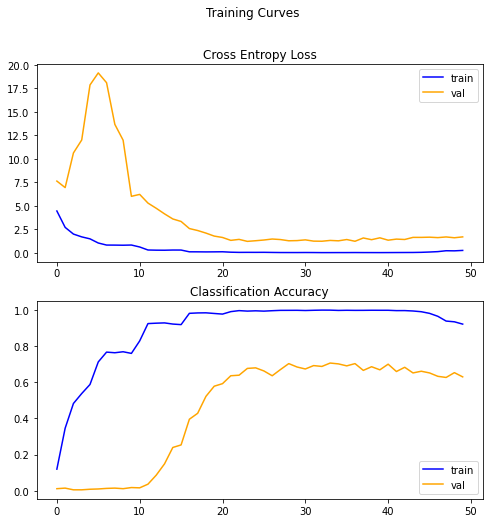


Test set evaluation metrics
30/30 [==============================] - 2s 38ms/step - loss: 1.6301 - accuracy: 0.6328
loss: 1.63
accuracy: 0.63


In [ ]:
resnet_MODEL = init_resnet_model(True, (64,64,3))

resnet_MODEL_history = train_model(resnet_MODEL, 50, 50, 5, cb = [])

model_report(resnet_MODEL, resnet_MODEL_history, 30)

Στη συνέχεια της εργαστηριακής αυτής άσκησης, θα εξετάσουμε την τεχνική του transfer learning, χρησιμοποιώντας το ResNet. Πρόκειται για ένα δίκτυο, ευρέως χρησιμοποιημένο σε εφαρμογές όρασης υπολογιστών (όπως ανάλυσης εικόνων που έχουμε και εδώ). Μια ιδιαιτερότητα του resnet, την οποία προσπαθήσαμε να εφαρμόσουμε και στο from scratch μοντέλο μας, είναι ότι σε κάποια layers συνδέεται και προστίθεται η αρχική μας εικόνα (ή μια πιο παλιά μορφή αυτής) στο υπάρχον output. Αυτή η τεχνική είναι χρήσιμη για την αποφυγή του φαινομένου vanishing gradient, αφού μπορούμε να διατηρήσουμε χρήσιμη αρχική πληροφορία πιο βαθιά στο δίκτυο. 

Εκτυπώνοντας τα χαρακτηριστικά του δικτύου ResNet50 (υπάρχουν διάφορα είδη, εμείς επιλέγουμε αυτό το συγκεκριμένο), βλέπουμε ότι αυτό αποτελείται απο 175 επίπεδα και 23.587.712 παραμέτρους (βάρη) ως προς εκπαίδευση, αριθμός αρκετά μεγαλύτερος από αυτός του VGG16. Για τη βελτιστοποιήσή του θα ακολουθήσουμε ανάλογη διαδικασία.

Αρχικά, αναφέρουμε το τελικό μοντέλο στο οποίο πετύχαμε την καλύτερη επίδοση. Τα συνολικά χαρακτηριστικά αυτού φαίνονται και παραπάνω, στο μοντέλο όπως παραδίδεδται. Εδώ θα αναφέρουμε τις τελικές τιμές των χαρακτηριστικών με τα οποία πειραματιστήκαμε καθώς και μία σύντομη ερμηνεία τους.


Οι επιδόσεις που πετυχαίνουμε με αυτά είναι:
- **training set -> 92.6%**
- **validation set -> 62.9%**
- **test set -> 63.2%**
Σημειώνουμε ότι αντίστοιχα ποσοστά πετύχαμε και με το from_scratch μοντέλο ResNet που αναπτύξαμε. Αντιλαμβανόμαστε έτσι τη συμβολή του transfer learning. Καταφέραμε, χωρίς ιδιαίτερο κόπο, μιας και πήραμε έτοιμο το δίκτυο και το εκαπιδεύσαμε για 50 εποχές μόλις, να πετύχουμε τις ίδιες επιδόσεις που πετύχαμε με ένα δίκτυο που έπρεπε να "σχεδιάσουμε" (σε επίπεδο κώδικα) από το μηδέν και να εκπαιδεύσουμε για τουλάχιστον 100 εποχές.  


Οι τιμές των παραμέτρων με τις οποίες πειραματιστήκαμε είναι:
- **freeze layers** : Η καλύτερη επίδοση του μοντέλου παρατηρείται με όλα τα επίπεδα unfreezed. Η συμπεριφορά αυτή δηλώνει μία έντονη εξάρτηση μεταξύ των διαφόρων επιπέδων του δικτύου. Η παρατήρηση αυτή είναι λογική αν σκεφτούμε ότι σε πολλά επίπεδα η αρχική είσοδος του επιπέδου μεταφέρεται αυτούσια στην έξοδο και την επηρεάζει. 
- **batch size** : Καταλήξαμε σε batch = 128.
- **resize(-method)** : Εφαρμόζουμε resize σε εικόνες 64x64 με τη μέθοδο bicubic. Το resize φαίνεται να βοηθάει σημαντικά τη βελτίωση της επίδοσης όπως θα αναλύσουμε και παρακάτω.
- **dropout** : 0.15
- **early-stopping** : Δεν εφαρμόζουμε.
- **optimizer-learning_rate** : Adam με learning rate 0.0001.


Ας δούμε τώρα αναλυτικά τα αποτελέσματα κατά τη βελτιστοποίηση για τις διάφορες παραμέτρους με τις οποίες πειραματιστήκαμε.

**trainable :** Αυτή ήταν η πρώτη παράμετρος με την οποία πειραματιστήκαμε. Αφήνοντας όλα τα επίπεδα trainable (unfreezed) πετύχαμε (training_set_accuracy, validation_set_accuracy) = (99.4%, 44.5%). Έχοντας όλα τα επίπεδα freezed έχουμε (2.9%, 6.8%). Παρατηρούμε ότι στην περίπτωση που δεν επιτρέπουμε μεταβολή των παραμέτρων το δίκτυο δεν μαθαίνει. Αφού η επίδοσή του στο training set παραμένει πολύ μικρή.

Δοκιμάζοντας ενδιάμεσες τιμές επιπέδων που κρατάμε freezed παρατηρήσαμε ότι όσο αυτές μειώνονταν η επίδοση τόσο στο training όσο και στο validation set αυξανόταν. Ενδεικτικά, αναφέρουμε ότι κρατώντας τα πρώτα 100 επίπεδα freezed έχουμε (80%, 21%) accuracy ενώ για 20 φτάνουμε τις τιμές (93.5%, 32.5%).

Συνεπώς, καταλήξαμε στο συμπέρασμα ότι η καλύτερη πρακτική για το εν λόγω δίκτυο είναι να αφήσουμε όλα τα επίπεδά του trainable. Φυσικά, στη συνέχεια των βελτιστοποιήσεων, δοκιμάσαμε να επιστρέψουμε σε ένα μικρό αριθμό (20) freezed αρχικών επιπέδων, όμως η επίδοση πάντα μειωνόταν.

Γνωρίζουμε ότι συνήθως, η διατήρηση μερικών αρχικών επιπέδων αμετάβλητων, έχει καλύτερα αποτελέσματα. Αυτό συμβαίνει διότι τα αρχικά επίπεδα ενός νευρωνικού εξάγουν κάποια θεμελιώδη χαρακτηριστικά των dataset. Επομένως, αν τα δεδομένα μοιάζουν θα θεμελιώδη χαρακτηριστικά του ενός θα είναι χρήσιμα και για το άλλο. Αυτή η γενική γνώση φαίνεται να διαψεύδεται εδώ. Αποδίδουμε αυτή τη συμπεριφορά στην ιδιαίτερη δομή του δικτύου ResNet.

**πλήθος κλάσεων :**  Δοκιμάσαμε τα διάφορα πλήθη κλάσεων που μας παρέχονται 20, 40, 60, 80 αν και τα τελικά αποτελέσματά μας θα αφορούν τις 80 κλάσεις, ανεξαρτήτως της επίδοσης που επιτυγχάνεται. τα αποτελέσματα που πετύχαμε είναι αντίστοιχα: 

[20, 40, 60, 80] -> [(97.7%, 36.2%), (93.3%, 31%), (77.2%, 33.1%), (57.6%, 27.8%)] 

Παρατηρούμε ότι όσο μειώνεται το πλήθος των κλάσεων, τα ποσοστά του training set αυξάνονται. Αυτό είναι αναμενόμενο, καθώς έχουμε λιγότερες "είδη" βαρών να μάθουμε, δηλαδή βάρη που θα οδηγούν στο ένα ή στο άλλο αποτέλεσμα για την ταξινόμηση κάθε δεδομένου. Ωστόσο, παρατηρούμε ότι η επίδοση στο validation set δε διαφέρει σημαντικα. Σίγουρα δε διαφέρει αντίστοιχα με τη διαφοροποίηση στο training set, ώστε να την αιτιολογήσει (δηλαδή να συμπεράνουμε ότι το δίκτυο πράγματι έμαθε κάτι περισσότερο με τις 20 κλάσεις και δεν απομνημόνευσε απλώς περισσότερα δεδομένα).

**Dropout :** Πειραματιστηκαμε με τιμές dropout 0.15, 0.3, 0.6. Η αύξηση της τιμής του dropout μείωσε το overfitting. Έχουμε ήδη παρατηρήσει ότι υπάρχει σημαντικό overfitting τόσο στα τελικα αποτελέσματά μας όσο και στα ενδιάμεσα που παραθέτουμε. Η μέθοδος του dropout ήταν η περισσότερο αποτελεσματική για την καταπολέμησή του. Χρησιμοποιήθηκε και η τεχνική του early stopping η οποία, όμως, έριξε πολύ την επίδοση τόσο στο training όσο και στο validation set. 

Πράγματι, οι μεγαλύτερες τιμές dropout συνεβαλαν στη μείωση του ovrfitting. Ωστόσο, αυτό δε συνεβη σε βαθμό που να μας δελεάσει να τις υιοθετήσουμε. Εφαρμόζοντας dropout=0.6 στο τελικό μας δίκτυο (που πετυχαίνει (92.6%, 62.9%)) φτάσαμε σε ένα ποσοστό (81.3%, 51.2%). Παρατηρούμε, άρα, ότι η μείωση του ποσοστού στο training set συνεπάγεται σχεδόν ίδια μείωση στο validation set. Επομένως, δεν προσφέρει σημαντικά στην αποφυγή του overfitting.

**optimizer & learning rate :**  Κατ' αρχάς, δοκιμάσαμε τη χρήση του SGD για τη βελτιστοποιήση του δικτύου. Το αποτέλεσμα ήταν αρκετά αποθαρρυντικό με τιμές στα (1.5%, 1.3%). Επομένως η επιλογή του Adam είναι ξεκάθαρη.

Στη συνέχεια, πειραματιστήκαμε με τιμές για το learning rate 0.00005 (η οποία δούλεψε στο προηγούμενο οντέλο μας) και 0.0001. Η τιμή 0.0001 φαίνεται να λειτουργεί καλύτερα σε αυτό το μοντέλο επομένως εφαρμόστηκε αυτή.

**batch_size :** Η αρχική τιμή του batch size ήταν 256. Αυτή μας έδωσε όλα τα αρχικά αποτελέσματα που να αναφέραμε στο trainable. Αλλάζοντάς την σε 128 παίρνουμε ελαφρώς χειρότερα αποτελέσματα ως ποσοστά, αλλά με σημαντικά μικρότερο overfitting. Συγκεκριμένα, από (96.4%, 33.7%) πάμε σε (57.6%, 27.8%). Στη συνέχεια, εφαρμόζουμε αυτή την τιμή, για να αποφύγουμε το overfitting και να δώσουμε τη δυνατότητα εκμάθησης στο δίκτυο. 

**resize input :** Όπως και στο παραπάνω δίκτυο, οι δυνατότητες της μνήμης RAM δε μας επιτρέπουν να κάνουμε resize σε εικόνες 128x128. Επομένως, αρκούμαστε στο 64x64. Το resize προσφέρει μια σημαντική αύξηση στα ποσοστά που πετυχαίνουμε και κυρίως στο validation set. Πηγαίνουμε από (57.6%, 27.8%) accuracy σε (92%, 50%). Μια μικρή επιπλέον βελτίωση επιτυγχάνεται αλλάζοντας τη μέθοδο του resize σε bicubic από bilinear (default τιμή). 

Η σημαντική αύξηση στην επίδοση του validation set με το resize αποδίδεται στο εξής γεγονός. Το δίκτυο που χρησιμοποιούμε εκπαιδεύτηκε στο ImageNet. Τα δεδομένα στον εν λόγο dataset έχουν πολύ μεγαλύτερες διαστάσεις εικόνων (γενικά 300x300 και το ResNet τις μειώνει με μια προεργασία στις 200x200 περίπου). Επομένως, η λειτουργικότητά του με τις σημαντικά μικρότερες διαστάσεις 32x32 στο CIFAR100 είναι αναμενόμενο να μεταβάλλεται. Έτσι ερμηνεύεται καλύτερα και η ανάγκη για εκπαίδευση όλου του δικτύου αντί να κρατήσουμε μερικά από τα αρχικά επίπεδα σταθερά.

####**Βελτιστοποιήση ως προς τις υπόλοιπες παραμέτρους**

Οι υπόλοιπες παράμετροι ως προς τις οποίες βελτιστοποιήσαμε τα from_scratch μοντέλα μας είναι: χρόνος εκπαίδευσης, μνήμη RAM, overfitting. Οι τεχνικές που εφαρμόσαμε μπορούν να εφαρμοστούν με τον ίδιο τρόπο και στα μοντέλα που προέρχονται από transfer learning. Η μέθοδος του transfer learning δεν αλλάζει κάτι στον τρόπο εφαρμογής των τεχνικών αυτών, επομένως δεν είναι πιθανό να παρατηρήσουμε σημαντικές διαφορές από τα προηγούμενα συμπεράσματά μας. 

Η ίδια η τεχνική του tranfer learning συμβάλλει ως μέθοδος για τη μείωση του χρόνου εκπαίδευσης. Παρατηρήσαμε και παραπάνω ότι για να φτάσουμε στα ίδια αποτελέσματα, με το ίδιο δίκτυο (ResNet) χρεαστήκαμε τις διπλάσιες εποχές στο from_scratch μοντέλο. Η παρατήρηση αυτή είναι, φυσικά, αναμενόμενη. 

Ως προς το overfitting παρατηρούμε ότι η χρήση των μοντέλων με το transfer learning μείωσε ελάχιστα το φαινόμενο. Εφόσον προηγουμένως είχαμε (98%, 60%) ενώ τώρα έχουμε (92%, 62%). Όμως, ακόμα το φαινόμενο είναι πολύ έντονο σε όλα τα μοντέλα.

**ΤΕΛΟΣ ΕΡΓΑΣΙΑΣ**

#### Εκπαίδευση βαρών

Ταυτόχρονα με την αρχιτεκτονική, στη μεταφορά μάθησης εισάγουμε και τη γνώση που έχει αποκτήσει το μοντέλο, δηλαδή τις τιμές των βαρών του όπως έχουν προκύψει μετά από εκπαίδευση συνήθως στο (τεράστιο) ImageNet. Οταν εισάγουμε ένα μοντέλο με μεταφορά μάθησης έχουμε τρεις επιλογές για την εκπαίδευση:
- να παγώσουμε τη συνελικτική βάση και να εκπαιδεύσουμε την κεφαλή ταξινόμησης (classification head). Αυτό αντιστοιχεί στο να χρησιμοποιήσουμε τη συνελικτική βάση για εξαγωγή χαρακτηριστικών (feature extraction), σημαία trainable = False.
- να συνεχίσουμε να εκπαιδεύουμε όλα τα επίπεδα του δικτύου, σημαία trainable = True.
- να εκπαιδευτεί μόνο ένα ποσοστό των επιπέδων, εβρισκόμενο προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.



#### Διαθέσιμα μοντέλα για μεταφορά μάθησης στο tf2

1. tf.keras.applications. Ο πιο απλός τρόπος για να κάνουμε μεταφορά μάθησης στο tf2 είναι μέσω του [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications) που παρέχει προεκπαιδευμένα μοντέλα από το Keras και συγκεκριμένα τα δίκτυα: DenseNet, Inception-ResNet V2, Inception V3, MobileNet v1, MobileNet v2, NASNet-A, ResNet, ResNet v2, VGG16, VGG19 και Xception V1. Η εισαγωγή των μοντέλων γίνεται παρόμοια με αυτή που δείξαμε παραπάνω για το VGG16.

2. TensorFlow Hub. Μπορείτε επίσης να χρησιμοποιήσετε μοντέλα τα οποία είναι διαθέσιμα στο αποθετήριο [TensoFlow Hub](https://tfhub.dev/s?fine-tunable=yes&module-type=image-augmentation,image-classification,image-feature-vector,image-generator,image-object-detection,image-others,image-style-transfer,image-rnn-agent&tf-version=tf2) το οποίο περιλαμβάνει πάνω από 100 προεκπαιδευμένα μοντέλα.

3. Αποθηκευμένα μοντέλα απο τρίτες πηγές. Μπορείτε επίσης να κάνετε μεταφορά μάθησης από τρίτες πηγές, είτε του συνόλου του νευρωνικού, αρχιτεκτονικής και βαρών, είτε μόνο της αρχιτεκτονικής ή των βαρών. Το μοντέλο θα πρέπει να έχει αποθηκευθεί σε ένα από τα δύο φορμάτ, Keras HDF5 format (.h5 ή .keras) ή στο SavedModel format που αναφέραμε στην εισαγωγή. Τα βάρη μπορούν να εισαχθούν και μόνα τους ως Checkpoints. Για περισσότερα, διαβάστε σχετικά τα λήμματα ["Save and load models"](https://www.tensorflow.org/tutorials/keras/save_and_load), ["Save and serialize"](https://www.tensorflow.org/guide/keras/save_and_serialize), ["Using the SavedModel format"](https://www.tensorflow.org/guide/saved_model) και δείτε για παράδειγμα πως μπορούμε να κάνουμε μεταφορά μάθησης από τα state-of-the-art EfficientNets ([1](https://www.dlology.com/blog/transfer-learning-with-efficientnet/), [2](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnethttps://)).

Σημειώστε ότι πολλά μοντέλα απαιτούν μεγαλύτερες διαστάσεις στην είσοδο από αυτές του CIFAR-100 και κατά συνέπεια τα δεδομένα πρέπει να [μετασχηματιστούν](https://www.tensorflow.org/api_docs/python/tf/image/resize). Προσέξτε ωστόσο τις απαιτήσεις σε μνήμη όταν αυτοί οι μετασχηματισμοί γίνονται απευθείας σε μεταβλητές (βλ. πιο κάτω "Διαχείριση μνήμης"). 


### Επαύξηση δεδομένων

Μια τεχνική που μπορεί να σας δώσει καλά αποτελέσματα είναι η επάυξηση δεδομένων (data augmentation). Η επαύξηση δεδομένων επιτρέπει να δημιουργήσουμε μεγαλύτερη ποικιλία στα δεδομένα εφαρμόζοντας τυχαίους αλλά ρεαλιστικούς μετασχηματισμούς στις εικόνες, όπως πχ η περιστροφη.

Μπορούμε να κάνουμε data augmetation με δύο τρόπους: με επίπεδα προεπεξεργασίας του Keras, ή με χρήση του tf.image. Δείτε [εδώ](https://www.tensorflow.org/tutorials/images/data_augmentation) σχετικά από το documentation του TensorFlow και [εδώ](https://stepup.ai/train_data_augmentation_keras/) ένα πρακτικό παράδειγμα στο CIFAR-10.

## Παρατηρήσεις ως προς τη βελτιστοποίηση

### Διαχείριση μνήμης (TFRecord)

Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι καθόλου αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούνα να αναγνωστούν γραμμικά. Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε τα σχετικά λήμματα [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).



### Υπερεκπαίδευση

Μπορείτε να πειραματιστείτε ως προς τον έλεγχο της υπερεκπαίδευσης (overfitting) με διάφορους τρόπους. Μεταξύ αυτών μπορούμε να αναφέρουμε τους εξής:
- Πρόωρος τερματισμός (early stopping). Μια μέθοδος που τερματίζει την εκπαίδευση αν δεν υπάρχει βελτίωση ως προς τη μετρική απόδοσης που παρακολουθούμε. [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)
- Dropout. Μια άλλη τεχνική για τη μείωση της υπερεκπαίδευσης είναι το Dropout. Είναι ένα είδος ομαλοποίησης (regularization) που επιβάλλει στα βάρη του δικτύου να παίρνουν μόνο μικρές τιμές. Εάν εφαρμόσουε dropout σε ένα επίπεδο του δικτύου, τότε ένα ποσοστό των βαρών του γίνεται τυχαία μηδενικό κατά την εκπαίδευση. [Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout)
- Επαύξηση δεδομένων. Η υπερεκπαίδευση συνήθως συμβαίνει όταν έχουμε λίγα ή/και πολύ όμοια δεδομένα εκπαίδευσης. Ένας τρόπος να διορθωθεί αυτό το πρόβλημα είναι να αυξήσουμε τα δεδομένα (data augmentation). Το data augmentation δημιουργεί νέα δεδομένα εκπαίδευσης με βάση τα υπάρχοντα εφαρμόζοντας τυχαίους μετασχηματισμούς ώστε να προκύπτουν αληθοφανείς εικόνες. [Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)

Βλέπε επίσης [Image classification](https://www.tensorflow.org/tutorials/images/classification).

### Χρόνος εκπαίδευσης

Το TensorFlow 2 προσφέρει νέους ή βελτιώνει διάφορους μηχανισμούς βελτιστοποίησης της εκπαίδευσης. Μεταξύ αυτών έχουμε τους εξής:
- Data prefetching (το χρησιμοποιήσαμε παραπάνω)
- Data reading parallelization 
- Map transformation parallelization
- Caching
- Reducing memory footprint

Συμβουλευτείτε για τα παραπάνω το [Better performance with the tf.data API](https://www.tensorflow.org/guide/data_performance)

### Εργαλεία υψηλού επιπέδου

Μεταξύ των εργαλείων βελτιστοποίησης υψηλού επιπέδου (high-level) του TensorFlow μπορούμε να αναφέρουμε τα ακόλουθα:

- [TensorBoard](https://www.tensorflow.org/tensorboard/get_started) και [What-If Tool](https://www.tensorflow.org/tensorboard/what_if_tool) Επικουρικό εργαλείο οπτικοποίησης/ανάλυσης για τον πειραματισμό στη εκπαίδευση
- [tf-explain](https://tf-explain.readthedocs.io/en/latest/) Προσφέρει μεθόδους επεξηγισιμότητας για το tf2
- [Keras Tuner](https://github.com/keras-team/keras-tuner) Βελτιστοποίηση υπερπαραμέτρων του Keras στο TensorFlow 2.0
- [AutoAugment](https://github.com/tensorflow/models/tree/master/research/autoaugment) Εκμάθηση της πολιτικης επαύξησης από τα δεδομένα

# Για τις χριστουγεννιάτικες διακοπές

## What's next for Deep Learning

The Godfathers of AI and 2018 ACM Turing Award winners Geoffrey Hinton, Yann LeCun, and Yoshua Bengio shared a stage in New York on Sunday night at an event organized by the Thirty-Fourth AAAI Conference on Artificial Intelligence (AAAI 2020). The trio of researchers have made deep neural networks a critical component of computing, and in individual talks and a panel discussion they discussed their views on current challenges facing deep learning and where it should be heading.

In [ ]:
from IPython.display import IFrame
IFrame(src='https://www.youtube.com/embed/UX8OubxsY8w', width=640, height=480)

## Αντίλογος: η κριτική του Schmidhuber για τους LeCun & Bengio & Hinton

(Ο Schmidhuber και ο Hochreiter [εισήγαγαν τα LSTM το 1997](https://www.bioinf.jku.at/publications/older/2604.pdf))

*Machine learning is the science of credit assignment. The machine learning community itself profits from proper credit assignment to its members. The inventor of an important method should get credit for inventing it. She may not always be the one who popularizes it. Then the popularizer should get credit for popularizing it (but not for inventing it). Relatively young research areas such as machine learning should adopt the honor code of mature fields such as mathematics: if you have a new theorem, but use a proof technique similar to somebody else's, you must make this very clear. If you "re-invent" something that was already known, and only later become aware of this, you must at least make it clear later.*

*As a case in point, let me now comment on a recent article in [Nature (2015) about "deep learning"](http://www.nature.com/nature/journal/v521/n7553/full/nature14539.html) in artificial neural networks (NNs), by LeCun & Bengio & Hinton (LBH for short), three CIFAR-funded collaborators who call themselves the "deep learning conspiracy" (e.g., LeCun, 2015). They heavily cite each other. Unfortunately, however, they fail to credit the pioneers of the field, which originated half a century ago. All references below are taken from the recent [deep learning overview](http://www.idsia.ch/~juergen/deep-learning-overview.html) (Schmidhuber, 2015), except for a few papers listed beneath this critique focusing on nine items.*

[Read more...](http://people.idsia.ch/~juergen/deep-learning-conspiracy.html)